# 2.0 DATA UNDERSTANDING STAGE

### Install required libraries 

# NB change cell from Markdown to Python
!pip install numpy
!pip install pandas
!pip install requests
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

### Import Required libraries

In [4]:
import numpy as np
import pandas as pd
import requests
import zipfile
from io import BytesIO
import matplotlib as plt

### Create URL of the zip file

In [5]:
secom_zip_url = "https://archive.ics.uci.edu/static/public/179/secom.zip"

### download the zipfile using request library

In [6]:
secom_zip_file = requests.get(secom_zip_url)

#### Identify list of the files on the zipfile

In [7]:
secom_files =  zipfile.ZipFile(BytesIO(secom_zip_file.content), 'r')

secom_files_names =  (zipfile.ZipFile(BytesIO(secom_zip_file.content))).namelist()
print(secom_files_names)

['secom.data', 'secom.names', 'secom_labels.data']


### create paths for features and label data

In [8]:
f_file = secom_files.open('secom.data')
l_file = secom_files.open('secom_labels.data')

In [9]:
#Create  column names and pandas dataframes for labels data

l_column_names=['classifications', 'date_time'] # create column labels

secom_labels_df = pd.read_csv(l_file, sep=r'\s+', header=None, names= l_column_names)

print(f"Dimensions of Labels data: ", secom_labels_df.shape)

print(secom_labels_df.head())


Dimensions of Labels data:  (1567, 2)
   classifications            date_time
0               -1  19/07/2008 11:55:00
1               -1  19/07/2008 12:32:00
2                1  19/07/2008 13:17:00
3               -1  19/07/2008 14:43:00
4               -1  19/07/2008 15:22:00


#### convert time stamps column to datetime format and Check if the timestamps column is ordinal (from latest to ealatest  time)


In [10]:
secom_labels_df['date_time'] = pd.to_datetime(secom_labels_df['date_time'], format='%d/%m/%Y %H:%M:%S')

is_ascending = secom_labels_df['date_time'].is_monotonic_increasing

if is_ascending:
    print("The timestamps column is in ascending order.")
else:
    print("The timestamps column is not in ascending order.")

The timestamps column is in ascending order.


#### Create column names pandas dataframes features data

In [11]:
f_column_names = [f"feature_{i}" for i in range(1, 592)]

secom_features_df = pd.read_csv(f_file, sep=r'\s+', header=None, names= f_column_names)
print(f"Dimensions of Features' data: ", secom_features_df.shape)

print(secom_features_df.head())

Dimensions of Features' data:  (1567, 591)
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602      100.0   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294      100.0   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102      100.0   
3    2988.72    2479.90  2199.0333   909.7926     1.3204      100.0   
4    3032.24    2502.87  2233.3667  1326.5200     1.5334      100.0   

   feature_7  feature_8  feature_9  feature_10  ...  feature_582  feature_583  \
0    97.6133     0.1242     1.5005      0.0162  ...          NaN       0.5005   
1   102.3433     0.1247     1.4966     -0.0005  ...     208.2045       0.5019   
2    95.4878     0.1241     1.4436      0.0041  ...      82.8602       0.4958   
3   104.2367     0.1217     1.4882     -0.0124  ...      73.8432       0.4990   
4   100.3967     0.1235     1.5031     -0.0031  ...          NaN       0.4800   

   feature_584  feature_585  feature_586  f

### Draw Histogram of Volatilities

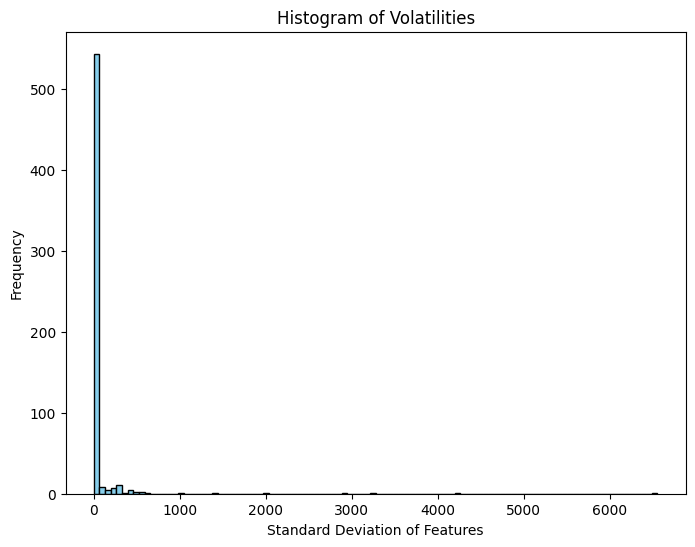

In [12]:
import matplotlib.pyplot as plt
# Calculate volatilities (standard deviations) for each column
volatilities = secom_features_df.std()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(volatilities, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Standard Deviation of Features')
plt.ylabel('Frequency')
plt.title('Histogram of Volatilities')
plt.grid(False)
plt.show()

### Draw a frequency distribution table and a pie chart of the classification variable

Frequency Distribution Table:
   Class  Frequency  Percentage
0     -1       1463   93.363114
1      1        104    6.636886


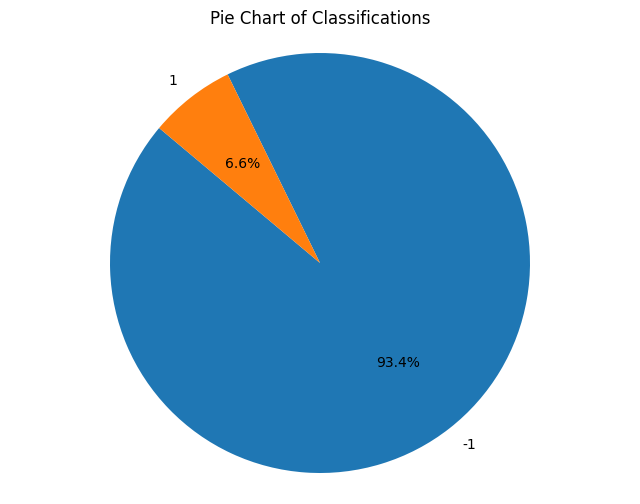

In [13]:
# Calculate frequency distribution
frequency_table = secom_labels_df['classifications'].value_counts().reset_index()
frequency_table.columns = ['Class', 'Frequency']

# Calculate percentage
total_count = frequency_table['Frequency'].sum()
frequency_table['Percentage'] = (frequency_table['Frequency'] / total_count) * 100

# Display frequency distribution table
print("Frequency Distribution Table:")
print(frequency_table)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(frequency_table['Frequency'], labels=frequency_table['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Classifications')
plt.axis('equal')
plt.show()


### Correlation heatmap

           feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
feature_1   1.000000  -0.145071   0.004775  -0.007655  -0.011047        NaN   
feature_2  -0.145071   1.000000   0.005802  -0.007603  -0.001641        NaN   
feature_3   0.004775   0.005802   1.000000   0.298935   0.095891        NaN   
feature_4  -0.007655  -0.007603   0.298935   1.000000  -0.058483        NaN   
feature_5  -0.011047  -0.001641   0.095891  -0.058483   1.000000        NaN   

           feature_7  feature_8  feature_9  feature_10  ...  feature_582  \
feature_1   0.002281   0.031510  -0.052731    0.009052  ...    -0.028380   
feature_2  -0.025702  -0.012084   0.031321    0.024015  ...     0.083463   
feature_3  -0.136225  -0.273970   0.023609    0.016291  ...    -0.010759   
feature_4  -0.685835   0.138290  -0.103656    0.068998  ...    -0.096619   
feature_5  -0.074368  -0.916410  -0.026035    0.054619  ...     0.088327   

           feature_583  feature_584  feature_585  feature_586  featu

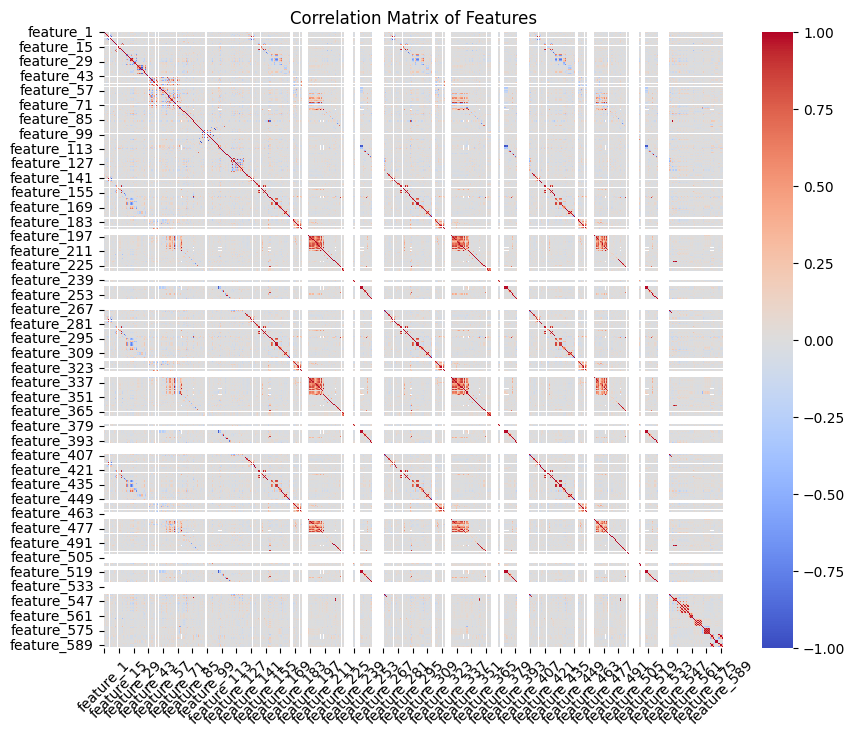

In [14]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = secom_features_df.corr()
print(correlation_matrix.head())
# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.show()

###  Check the Count and Percentages of Missing values in the dataframe

Number of columns WITHOUT Missing Values:
52
Number of columns WITH Missing Values:
539
Frequency Table of Percentage of Missing Values in Each Column:
     Bin  Frequency
0  <=55%        514
1   >55%         25


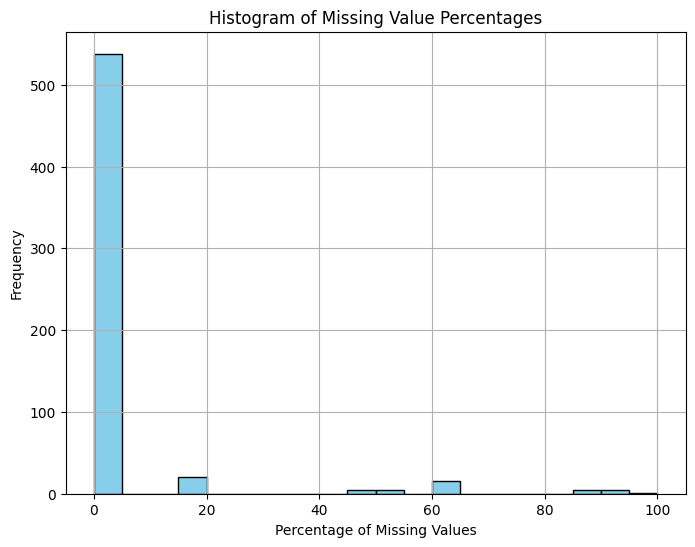

In [15]:

# Calculate percentage of missing values in each column
missing_percentages2 = (secom_features_df.isnull().sum() / len(secom_features_df)) * 100

# Create bins
bins = [0, 55, 100]

# Use pd.cut to categorize percentages into bins
bin_labels = ['<=55%', '>55%']
categories = pd.cut(missing_percentages2, bins, labels=bin_labels)

# Create a DataFrame to store the frequency table
frequency_table2 = categories.value_counts().reset_index()
frequency_table2.columns = ['Bin', 'Frequency']

# Determine the number of columns with and without missing values
print("Number of columns WITHOUT Missing Values:")
print((secom_features_df.isnull().sum() == 0).sum())

print("Number of columns WITH Missing Values:")
print((secom_features_df.isnull().sum()>0).sum())


print("Frequency Table of Percentage of Missing Values in Each Column:")
print(frequency_table2)

# Plot a histogram of the missing value percentages
plt.figure(figsize=(8, 6))
plt.hist(missing_percentages2, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Frequency')
plt.title('Histogram of Missing Value Percentages')
plt.grid(True)
plt.show()




In [16]:
# duplicate identification

# Find columns with 100% duplicate values
columns_with_100_percent_duplicates = secom_features_df.columns[secom_features_df.nunique() == 1]

print("Columns with 100% duplicate values:")
print(len(columns_with_100_percent_duplicates))

print("Pecentage of Columns with 100% duplicate values:")

print(len(columns_with_100_percent_duplicates)/len(secom_features_df.columns)*100, "%")


Columns with 100% duplicate values:
116
Pecentage of Columns with 100% duplicate values:
19.627749576988155 %


# 3.0 DATA PREPARATION

### Merge the Features and Labels data frames

In [17]:
secom_merged_df = pd.merge(secom_labels_df, secom_features_df, left_index=True, right_index=True)

print(f"Dimensions of merged data: ", secom_merged_df.shape)

print(secom_merged_df.head())

Dimensions of merged data:  (1567, 593)
   classifications           date_time  feature_1  feature_2  feature_3  \
0               -1 2008-07-19 11:55:00    3030.93    2564.00  2187.7333   
1               -1 2008-07-19 12:32:00    3095.78    2465.14  2230.4222   
2                1 2008-07-19 13:17:00    2932.61    2559.94  2186.4111   
3               -1 2008-07-19 14:43:00    2988.72    2479.90  2199.0333   
4               -1 2008-07-19 15:22:00    3032.24    2502.87  2233.3667   

   feature_4  feature_5  feature_6  feature_7  feature_8  ...  feature_582  \
0  1411.1265     1.3602      100.0    97.6133     0.1242  ...          NaN   
1  1463.6606     0.8294      100.0   102.3433     0.1247  ...     208.2045   
2  1698.0172     1.5102      100.0    95.4878     0.1241  ...      82.8602   
3   909.7926     1.3204      100.0   104.2367     0.1217  ...      73.8432   
4  1326.5200     1.5334      100.0   100.3967     0.1235  ...          NaN   

   feature_583  feature_584  feature_585

### Split data into Training and Test data

In [18]:
# Import the module
from sklearn.model_selection import train_test_split

X = secom_merged_df.drop(["classifications", "date_time"], axis=1).values
y = secom_merged_df["classifications"].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)




### Descriptives of trian and test data for both features and target variable

##### check the shape of train and test datasets

In [19]:
print("Shape of features training data: ")
print(np.shape(X_train))
print("Shape of target training data: ")
print(np.shape(y_train))
print("Shape of features test data: ")
print(np.shape(X_test))
print("Shape of taget test data: ")
print(np.shape(y_test))

Shape of features training data: 
(1175, 591)
Shape of target training data: 
(1175,)
Shape of features test data: 
(392, 591)
Shape of taget test data: 
(392,)


#### Check the composition of the target variable in the Training and test data

In [68]:
#Create a function to create frequency table

def draw_frequency(data):
    # Calculate frequency distribution
    unique_values, counts = np.unique(data, return_counts=True)

    # Calculate total count
    total_count = len(data)

    # Calculate percentage distribution
    percentage_counts = counts / total_count * 100

    # Merge frequency and percentage distributions into a single NumPy array
    distribution = np.stack((unique_values, counts, percentage_counts), axis=-1)
    
    # Convert them to pandas DataFrame
    distribution_df = pd.DataFrame(distribution, columns=['Class', 'Frequency', 'Percentage'])

    return distribution_df

# Draw the distribution of target variable in training and test data set
freuency_y_trn = draw_frequency(y_train)
frequency_y_tst= draw_frequency(y_test)
# Print the result
print("Distribution of target values in train data:")
print(freuency_y_trn)

print("Distribution of target values in test data:")
print(frequency_y_tst)



Distribution of target values in train data:
   Class  Frequency  Percentage
0   -1.0     1097.0   93.361702
1    1.0       78.0    6.638298
Distribution of target values in test data:
   Class  Frequency  Percentage
0   -1.0      366.0   93.367347
1    1.0       26.0    6.632653


### Variance of columns

Number of columns with zero variance: 116
Proportion of Columns with zero variance:
19.627749576988155 %


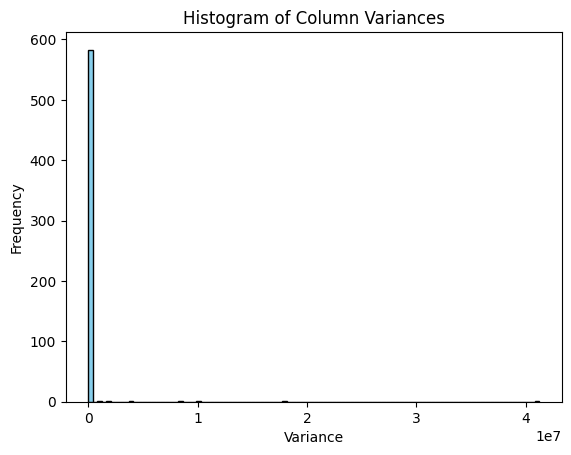

In [50]:
# Convert X_train data to Pandas df
X_train_df = pd.DataFrame(X_train, columns=f_column_names)
# Calculate the variance of each column
column_variances = X_train_df.var()

# Subset the columns with zero variance
zero_variance_columns = column_variances[column_variances == 0].index.tolist()

# Print the columns with zero variance
print("Number of columns with zero variance:", len(zero_variance_columns))

print("Proportion of Columns with zero variance:")

print(len(zero_variance_columns)/len(X_train_df.columns)*100, "%")

#plot histogam of variance

plt.hist(column_variances, bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of Column Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

###  Check the Count and Percentages of Missing values in each feature

The total number of features WITHOUT Missing Values:
128
The total number of features WITH Missing Values:
463
The total number of features with NAs WITHIN the threshold of 80% NAs:
454
The total number of features with NAs ABOVE the threshold of 80% NAs:
9


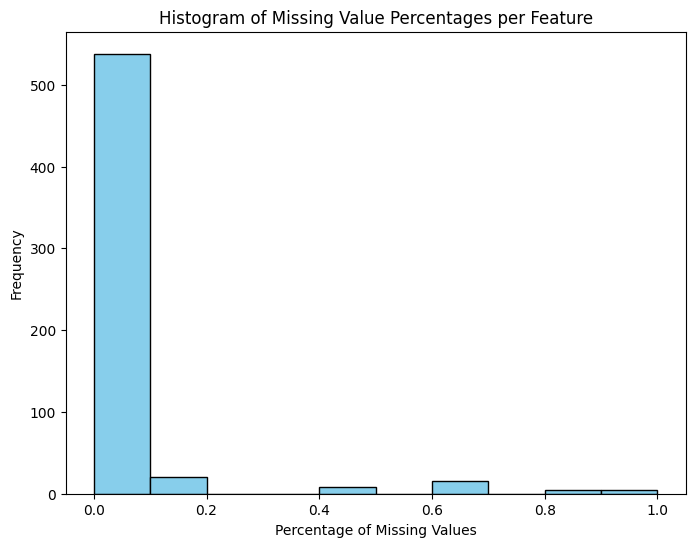

In [122]:
# Calculate percentage of missing values in each feature 
missing_df= X_train_df.isnull().mean()

# Determine the number of features with and without missing values
print("The total number of features WITHOUT Missing Values:")
print((missing_df == 0).sum())

print("The total number of features WITH Missing Values:")
print((missing_df > 0).sum())

# Determine the number of features WITHIN the threshold of 80% NAs

print("The total number of features with NAs WITHIN the threshold of 80% NAs:")
print(((missing_df > 0) & (missing_df <=0.80)).sum())

# Determine the number of features ABOVE the threshold of 80% NAs

print("The total number of features with NAs ABOVE the threshold of 80% NAs:")
print((missing_df > 0.80).sum())

# Plot a histogram of the missing value percentages
plt.figure(figsize=(8, 6))
plt.hist(missing_df, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Frequency')
plt.title('Histogram of Missing Value Percentages per Feature')
plt.grid(False)